In [1]:
pip install datasets pandas matplotlib seaborn


In [2]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
!pip install --upgrade datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12

In [1]:
!pip install datasets --upgrade
from datasets import load_dataset

# Now, try loading the dataset again
dataset = load_dataset("surrey-nlp/PLOD-CW-25")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/268 [00:00<?, ?B/s]

PLOD-CW-25-Train.parquet:   0%|          | 0.00/343k [00:00<?, ?B/s]

PLOD-CW-25-Test.parquet:   0%|          | 0.00/55.5k [00:00<?, ?B/s]

PLOD-CW-25-Val.parquet:   0%|          | 0.00/35.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/250 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/150 [00:00<?, ? examples/s]

In [2]:
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 250
    })
    validation: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 150
    })
})


In [3]:
print(dataset["train"][0])  # First item in the training data


{'tokens': ['MRR', ',', 'mortality', 'rate', 'ratio', ';', 'TBI', ',', 'traumatic', 'brain', 'injury', '.'], 'pos_tags': ['NOUN', 'PUNCT', 'NOUN', 'NOUN', 'NOUN', 'PUNCT', 'PROPN', 'PUNCT', 'ADJ', 'NOUN', 'NOUN', 'PUNCT'], 'ner_tags': ['B-AC', 'O', 'B-LF', 'I-LF', 'I-LF', 'O', 'B-AC', 'O', 'B-LF', 'I-LF', 'I-LF', 'O']}


In [5]:
import pandas as pd

# Convert train dataset to pandas dataframe
train_df = pd.DataFrame({
    'tokens': dataset['train']['tokens'],
    'pos_tags': dataset['train']['pos_tags'],
    'labels': dataset['train']['ner_tags']
})

In [6]:
# Convert train dataset to pandas dataframe
train_df = pd.DataFrame({
    'tokens': dataset['train']['tokens'],
    'pos_tags': dataset['train']['pos_tags'],
    'labels': dataset['train']['ner_tags']
})

# Similarly, you can also convert validation and test if needed
val_df = pd.DataFrame({
    'tokens': dataset['validation']['tokens'],
    'pos_tags': dataset['validation']['pos_tags'],
    'labels': dataset['validation']['ner_tags']
})

test_df = pd.DataFrame({
    'tokens': dataset['test']['tokens'],
    'pos_tags': dataset['test']['pos_tags'],
    'labels': dataset['test']['ner_tags']
})

# Now, check what the train dataframe looks like
print(train_df.head())


                                              tokens  \
0  [MRR, ,, mortality, rate, ratio, ;, TBI, ,, tr...   
1  [HPC, ,, hippocampus, ;, mOFC, ,, medial, OFC,...   
2  [In, addition, to, the, effects, on, cell, gro...   
3  [Abbreviations, :, HC, ,, C, -, terminal, rece...   
4   [LL, :, lower, limit, ,, UL, :, upper, limit, .]   

                                            pos_tags  \
0  [NOUN, PUNCT, NOUN, NOUN, NOUN, PUNCT, PROPN, ...   
1  [PROPN, PUNCT, NOUN, PUNCT, NOUN, PUNCT, ADJ, ...   
2  [ADP, NOUN, ADP, DET, NOUN, ADP, NOUN, NOUN, C...   
3  [NOUN, PUNCT, PROPN, PUNCT, NOUN, PUNCT, ADJ, ...   
4  [PROPN, PUNCT, ADJ, NOUN, PUNCT, PROPN, PUNCT,...   

                                              labels  
0  [B-AC, O, B-LF, I-LF, I-LF, O, B-AC, O, B-LF, ...  
1  [B-AC, O, B-LF, O, O, O, O, B-AC, O, B-AC, O, ...  
2  [O, O, O, O, O, O, O, O, O, O, O, O, B-AC, B-A...  
3  [O, O, B-AC, O, B-LF, I-LF, I-LF, I-LF, I-LF, ...  
4   [B-AC, O, B-LF, I-LF, O, B-AC, O, B-LF, I-LF, O

In [ ]:
print("Number of training examples:", len(train_df))
print("Number of validation examples:", len(val_df))
print("Number of test examples:", len(test_df))


In [7]:
# Flatten all labels into one big list
all_labels = sum(train_df['labels'].tolist(), [])

# Count how many times each label appears
from collections import Counter
label_counts = Counter(all_labels)

print(label_counts)


Counter({'O': 62474, 'I-LF': 9525, 'B-AC': 6626, 'B-LF': 3923})


In [10]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

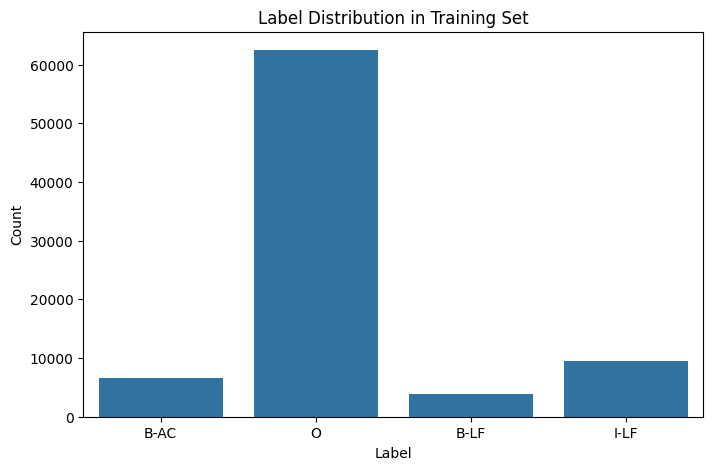

In [13]:
# Plot the label distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.title("Label Distribution in Training Set")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


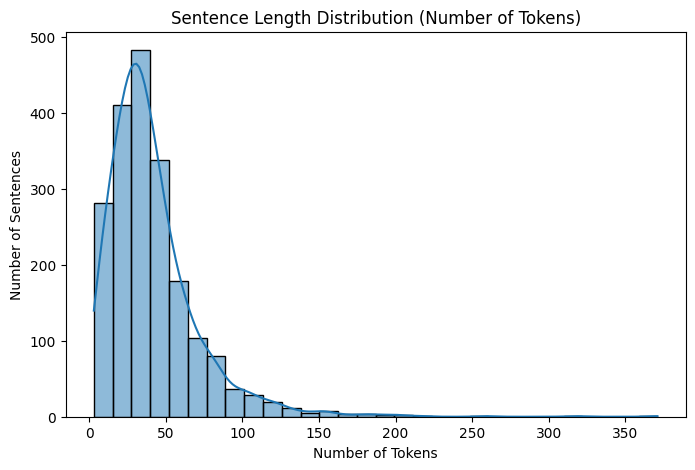

In [14]:
# Find out how many tokens in each sentence
train_df['sentence_length'] = train_df['tokens'].apply(len)

# Plot a histogram
plt.figure(figsize=(8, 5))
sns.histplot(train_df['sentence_length'], bins=30, kde=True)
plt.title("Sentence Length Distribution (Number of Tokens)")
plt.xlabel("Number of Tokens")
plt.ylabel("Number of Sentences")
plt.show()


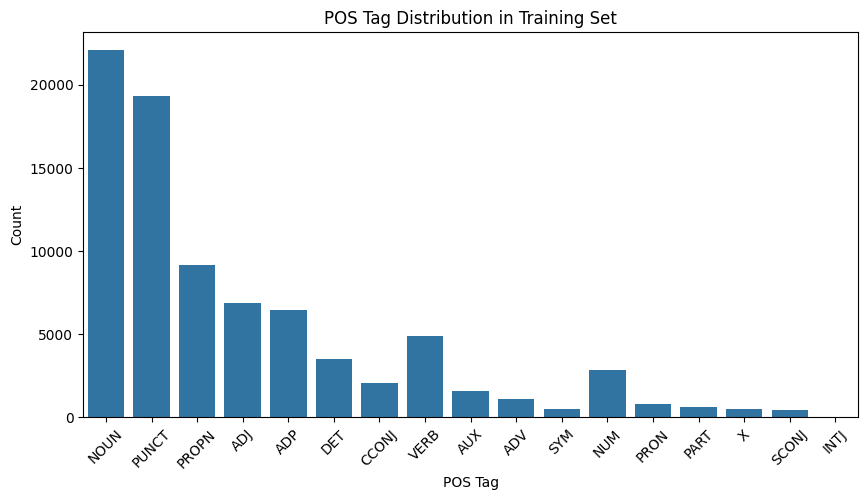

In [15]:
# Flatten all POS tags into one big list
all_pos_tags = sum(train_df['pos_tags'].tolist(), [])

# Count POS tags
pos_counts = Counter(all_pos_tags)

# Plot POS tag distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()))
plt.xticks(rotation=45)
plt.title("POS Tag Distribution in Training Set")
plt.xlabel("POS Tag")
plt.ylabel("Count")
plt.show()


In [16]:
abbreviation_counts = {}

# Go through tokens and labels
for tokens, labels in zip(train_df['tokens'], train_df['labels']):
    for token, label in zip(tokens, labels):
        if label == 'B-AC':
            abbreviation_counts[token] = abbreviation_counts.get(token, 0) + 1

# Display top 10 repeated abbreviations
sorted_abbreviations = sorted(abbreviation_counts.items(), key=lambda x: x[1], reverse=True)
print(sorted_abbreviations[:10])


[('-', 330), ('CI', 61), ('WT', 47), ('HR', 40), ('OR', 40), ('/', 39), ('BMI', 39), ('GFP', 39), ('TB', 31), ('SD', 28)]


In [17]:
from collections import Counter

# Store all abbreviations
abbreviations = []

# Go through each sentence
for tokens, labels in zip(train_df['tokens'], train_df['labels']):
    for token, label in zip(tokens, labels):
        if label == 'B-AC':
            abbreviations.append(token)

# Count how many times each abbreviation appears
abbreviation_counts = Counter(abbreviations)

# Show most common repeated abbreviations
print("Top 10 repeated abbreviations:")
print(abbreviation_counts.most_common(10))


Top 10 repeated abbreviations:
[('-', 330), ('CI', 61), ('WT', 47), ('HR', 40), ('OR', 40), ('/', 39), ('BMI', 39), ('GFP', 39), ('TB', 31), ('SD', 28)]


In [18]:
from collections import defaultdict

# Dictionary to store: abbreviation -> set of possible long forms
abbr_to_longforms = defaultdict(set)

# Loop through each sentence
for tokens, labels in zip(train_df['tokens'], train_df['labels']):
    abbr = None
    longform = []
    collecting_lf = False

    for token, label in zip(tokens, labels):
        if label == 'B-AC':
            abbr = token  # found abbreviation
        elif label == 'B-LF':
            longform = [token]
            collecting_lf = True
        elif label == 'I-LF' and collecting_lf:
            longform.append(token)
        else:
            if collecting_lf:
                if abbr:
                    lf_text = " ".join(longform)
                    abbr_to_longforms[abbr].add(lf_text)
                collecting_lf = False
                longform = []

# Filter to show only abbreviations with more than one long form
print("Abbreviations with multiple long forms:")
for abbr, lfs in abbr_to_longforms.items():
    if len(lfs) > 1:
        print(f"{abbr} → {list(lfs)}")


Abbreviations with multiple long forms:
d → ['LV posterior wall thickness at end - diastole', 'aquaporin-3', 'ejection fraction', 'LV anterior wall thickness at end - diastole']
HC → ['C - terminal receptor - binding domain', 'healthy control', 'healthy control participants']
KD → ['glutathione compound glutathione reduced ethyl ester', 'knockdown', 'equilibrium dissociation constants', 'knock - down', 'reactive oxygen species', 'equilibrium dissociation constant']
AMPK → ['FOrkhead boX O', 'AMP - activated protein kinase', 'double - stranded RNA']
HbA1c → ['major adverse cardiovascular events', 'glycated hemoglobin', 'Glycated Hemoglobin', 'glycated haemoglobin', 'high - density lipoprotein', 'hemoglobin A1c']
IR → ['ionotropic receptor', 'homeostasis model assessment of insulin resistance', 'incidence rate', 'insulin resistance', 'homeostatic model assessment of insulin resistance']
TCR → ['high - throughput sequencing of TCR repertoires', 'T cell receptor', 'T - cell receptor']
BCG 

In [19]:
from collections import Counter

# Extract all long forms as phrases
long_forms = []

for tokens, labels in zip(train_df['tokens'], train_df['labels']):
    lf = []
    collecting = False
    for token, label in zip(tokens, labels):
        if label == 'B-LF':
            lf = [token]
            collecting = True
        elif label == 'I-LF' and collecting:
            lf.append(token)
        else:
            if collecting:
                long_forms.append(" ".join(lf))
                collecting = False
    if collecting and lf:
        long_forms.append(" ".join(lf))  # catch at end of sentence

# Count repeated long forms
lf_counts = Counter(long_forms)
print("Top 10 repeated long forms:")
print(lf_counts.most_common(10))


Top 10 repeated long forms:
[('confidence interval', 34), ('wild - type', 28), ('body mass index', 28), ('green fluorescent protein', 23), ('hazard ratio', 21), ('standard deviation', 18), ('odds ratio', 16), ('knockout', 14), ('World Health Organization', 12), ('antiretroviral therapy', 12)]


In [20]:
import re
from collections import Counter

abbreviations = []

for tokens, labels in zip(train_df['tokens'], train_df['labels']):
    for token, label in zip(tokens, labels):
        if label == 'B-AC':
            # Only include alphabetic or alphanumeric abbreviations (ignore '-', '/')
            if re.match(r'^[A-Za-z0-9]+$', token):
                abbreviations.append(token)

abbreviation_counts = Counter(abbreviations)

print("Top 10 repeated abbreviations (cleaned):")
print(abbreviation_counts.most_common(10))


Top 10 repeated abbreviations (cleaned):
[('CI', 61), ('WT', 47), ('HR', 40), ('OR', 40), ('BMI', 39), ('GFP', 39), ('TB', 31), ('SD', 28), ('C', 27), ('MS', 24)]


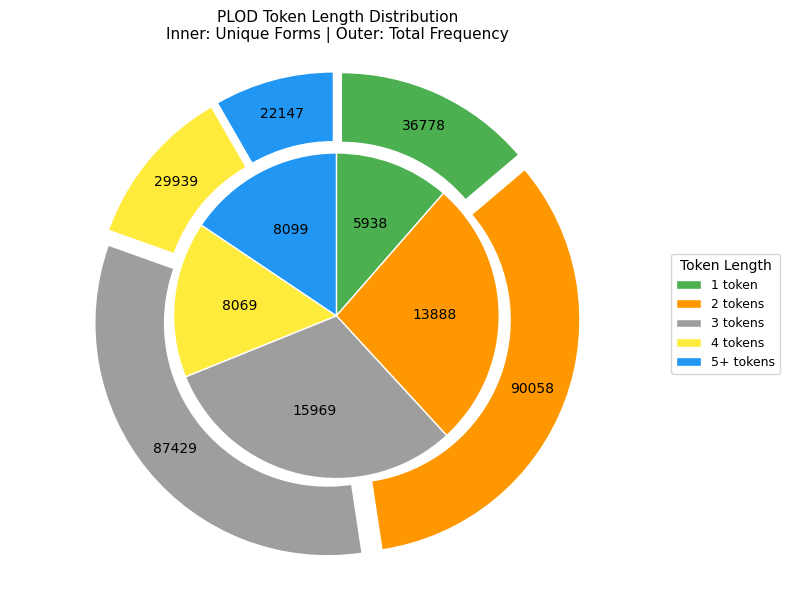

In [21]:
import matplotlib.pyplot as plt

# Final corrected data
labels = ['1 token', '2 tokens', '3 tokens', '4 tokens', '5+ tokens']
outer_vals = [36778, 90058, 87429, 29939, 22147]  # Total frequency (outer)
inner_vals = [5938, 13888, 15969, 8069, 8099]     # Unique forms (inner)

# Set color order: green, orange, grey, yellow, blue
colors = ['#4CAF50', '#FF9800', '#9E9E9E', '#FFEB3B', '#2196F3']
explode = [0.05] * len(labels)  # Explode all outer slices

# Start plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Outer ring – total frequency, clockwise
wedges_outer, _, autotexts_outer = ax.pie(
    outer_vals,
    radius=1.0,
    labels=None,
    colors=colors,
    explode=explode,
    autopct=lambda pct: f"{int(pct * sum(outer_vals) / 100)}",
    pctdistance=0.85,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(width=0.3, edgecolor='white')
)

# Inner ring – unique forms, solid center, clockwise
wedges_inner, _, autotexts_inner = ax.pie(
    inner_vals,
    radius=0.7,
    labels=None,
    colors=colors,
    startangle=90,
    counterclock=False,
    autopct=lambda pct: f"{int(pct * sum(inner_vals) / 100)}",
    pctdistance=0.6,
    wedgeprops=dict(edgecolor='white')
)

# Title and legend
ax.set_title("PLOD Token Length Distribution\nInner: Unique Forms | Outer: Total Frequency", fontsize=11)
ax.legend(wedges_outer, labels, title="Token Length", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)
ax.axis('equal')  # Keep pie chart circular

plt.tight_layout()
plt.show()


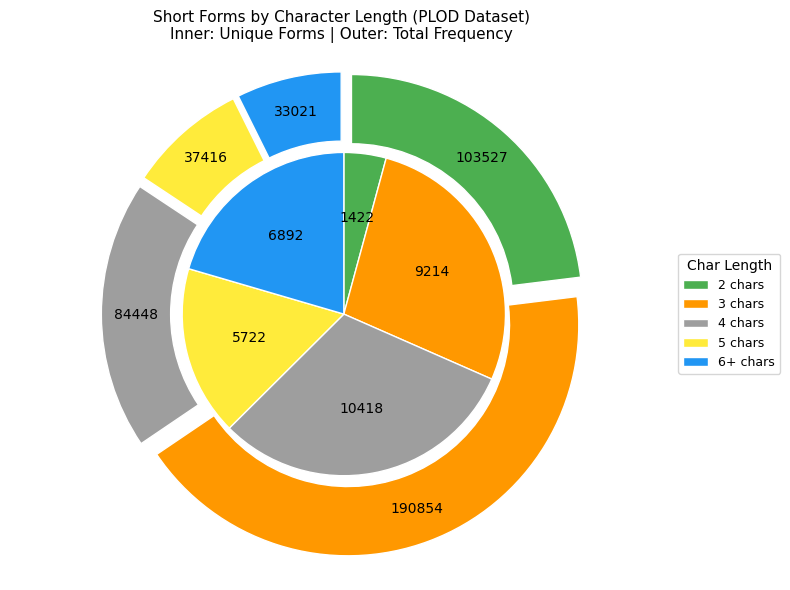

In [22]:
import matplotlib.pyplot as plt

# Final verified values
labels = ['2 chars', '3 chars', '4 chars', '5 chars', '6+ chars']
outer_vals = [103527, 190854, 84448, 37416, 33021]  # Total frequency
inner_vals = [1422, 9214, 10418, 5722, 6892]         # Unique forms

# Color scheme: green, orange, grey, yellow, blue
colors = ['#4CAF50', '#FF9800', '#9E9E9E', '#FFEB3B', '#2196F3']
explode = [0.05] * len(labels)

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

# Outer ring: total frequency (exploded)
wedges_outer, _, autotexts_outer = ax.pie(
    outer_vals,
    radius=1.0,
    labels=None,
    colors=colors,
    explode=explode,
    autopct=lambda pct: f"{round(pct * sum(outer_vals) / 100)}",
    pctdistance=0.85,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(width=0.3, edgecolor='white')
)

# Inner ring: unique forms (solid pie)
# The line below was changed. 'auto' was changed to 'autopct' and the lambda function was applied
wedges_inner, _, autotexts_inner = ax.pie(
    inner_vals,
    radius=0.7,
    labels=None,
    colors=colors,
    startangle=90,
    counterclock=False,
    autopct=lambda pct: f"{round(pct * sum(inner_vals) / 100)}", # This line was changed to fix the error
    pctdistance=0.6,
    wedgeprops=dict(edgecolor='white')
)

# Title and legend
ax.set_title("Short Forms by Character Length (PLOD Dataset)\nInner: Unique Forms | Outer: Total Frequency", fontsize=11)
ax.legend(wedges_outer, labels, title="Char Length", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)
ax.axis('equal')  # Ensure the pie is a circle

plt.tight_layout()
plt.show()